In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


<h1>1.read Data And Cleaning </h1>


In [2]:
read_data= pd.read_csv("jordan_food_price1.csv")#read data
#Drop the National Average and filteration the columns
read_data.drop(read_data[(read_data['market']=='National Average')].index, inplace=True) 
read_data_1=read_data.drop(["admin1","admin2","longitude","latitude"], axis=1)
read_data_1.reset_index(drop=True)
#add new columns to make the analyses
read_data_1[['year','month','day']] = read_data_1['date'].str.split('-', expand=True)
read_data_1['date']=pd.to_datetime(read_data_1.date)
read_data_1["date_1"]=read_data_1['date'].dt.strftime('%Y-%m')
date_columns = read_data_1.select_dtypes(include=['datetime64']).columns.tolist()
read_data_1[date_columns] = read_data_1[date_columns].astype(str)
read_data_1['pct_change']=read_data_1.price.pct_change( periods=-1)#add new features  to use in model 
aqaba=read_data_1[(read_data_1['market']=='Al Aqaba')]
#take the value of mean to specific cities how will make the analysis
df_aqaba=aqaba.groupby(["year","commodity"])["price"].mean()
df_aqaba.reset_index()
my_series = pd.Series(df_aqaba)
df_aqaba_1 = my_series.to_frame()
df_aqaba_2=df_aqaba_1.reset_index()
df_aqaba_2['commodity']=df_aqaba_2['commodity'].astype('category')
df_aqaba_2.columns=['year','commodity','mean price']
amman=read_data_1[(read_data_1['market']=='Amman')]
df_amman=amman.groupby(["year","commodity"])["price"].mean()
df_amman.reset_index()
my_series_1 = pd.Series(df_amman)
df_amman_1 = my_series_1.to_frame()
df_amman_2=df_amman_1.reset_index()
df_amman_2['commodity']=df_amman_2['commodity'].astype('category')
df_amman_2.columns=['year','commodity','mean price']



In [3]:
#summary statistics for data
read_data_1.describe()

,price,usdprice,pct_change
count,27521.000000,27521.000000,27520.000000
mean,2.107618,2.968230,1.453842
std,2.423516,3.412869,3.689632
min,0.150000,0.211200,-0.966013
25%,0.650000,0.909700,-0.636364
50%,1.110000,1.556300,0.128571
75%,2.240000,3.157300,1.485714
max,15.300000,21.546400,38.130435


In [4]:
#add the National Average into new data frame to better understand and deal with it
data_1=pd.read_csv("jordan_food_price1.csv")
National_Average=pd.DataFrame(data_1,columns=['market'])
National_Average=data_1[data_1["market"]=='National Average']

new_National_Average=National_Average.drop(["admin1","admin2","longitude","latitude"], axis=1)
new_National_Average.reset_index(drop=True)
#add new columns to make the analyses
new_National_Average[['year','month','day']] = new_National_Average['date'].str.split('-', expand=True)
new_National_Average

,date,market,category,commodity,unit,price,usdprice,year,month,day
0,2011-01-15,National Average,cereals and tubers,Bread (pita),KG,0.16,0.2253,2011,01,15
1,2011-01-15,National Average,cereals and tubers,Rice (imported),KG,0.90,1.2674,2011,01,15
2,2011-01-15,National Average,oil and fats,Oil (vegetable),1.8 L,1.50,2.1124,2011,01,15
3,2011-01-15,National Average,pulses and nuts,Pulses,KG,1.20,1.6899,2011,01,15
4,2011-02-15,National Average,cereals and tubers,Bread (pita),KG,0.16,0.2253,2011,02,15
...,...,...,...,...,...,...,...,...,...,...
2048,2016-12-15,National Average,vegetables and fruits,Garlic,KG,2.74,3.8530,2016,12,15
2049,2016-12-15,National Average,vegetables and fruits,Onions,KG,0.60,0.8407,2016,12,15
2050,2016-12-15,National Average,vegetables and fruits,Oranges (big size),KG,1.38,1.9476,2016,12,15
2051,2016-12-15,National Average,vegetables and fruits,Spinach,KG,0.36,0.5112,2016,12,15


<h1><strong>2.Visualizations and statistics  </strong></h1>

<p><strong>Getting prices for selected items</strong></p>

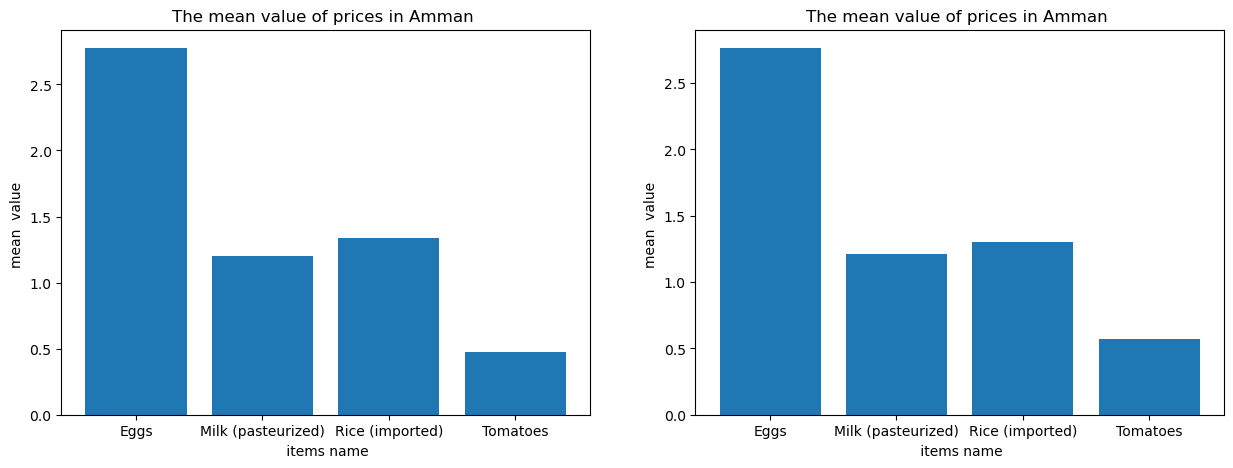

In [5]:
#take sample of item the amman and aqaba and drow the mean value
df_aqaba_3=df_aqaba_2[(df_aqaba_2["commodity"]=="Tomatoes")
                      |(df_aqaba_2["commodity"]=='Milk (pasteurized)')
                      |(df_aqaba_2["commodity"]=="Rice (imported)")
                      |(df_aqaba_2["commodity"]=="Eggs")]
df_amman_3=df_amman_2[(df_amman_2["commodity"]=="Tomatoes")
                      |(df_amman_2["commodity"]=='Milk (pasteurized)')
                      |(df_amman_2["commodity"]=="Rice (imported)")
                      |(df_amman_2["commodity"]=="Eggs")]
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.bar(df_aqaba_3['commodity'],df_aqaba_3['mean price'])
plt.title('The mean value of prices in Amman ')
plt.ylabel('mean  value ')
plt.xlabel(' items name')

plt.subplot(1, 2, 2)
plt.bar(df_amman_3['commodity'],df_amman_3['mean price'])
plt.title('The mean value of prices in Amman ')
plt.ylabel('mean  value ')
plt.xlabel(' items name')
plt.show()

In [6]:
#take the value of std to specific cities how will make the analysis
aqaba_std=read_data_1[(read_data_1['market']=='Al Aqaba')] 
aqaba_std_1=aqaba_std.groupby(["year","commodity"])["price"].std()
aqaba_std_1.reset_index()
my_series_3 = pd.Series(aqaba_std_1)
df_aqaba_std_1 = my_series_3.to_frame()
df_aqaba_std_2=df_aqaba_std_1.reset_index()
df_aqaba_std_2['commodity']=df_aqaba_std_2['commodity'].astype('category')
df_aqaba_std_2.columns=['year','commodity','mean price']
amman_std=read_data_1[(read_data_1['market']=='Amman')]
df_amman_std=amman_std.groupby(["year","commodity"])["price"].std()
df_amman_std.reset_index()
my_series_4 = pd.Series(df_amman_std)
df_amman_std_1 = my_series_4.to_frame()
df_amman_std_2=df_amman_std_1.reset_index()
df_amman_std_2['commodity']=df_amman_std_2['commodity'].astype('category')
df_amman_std_2.columns=['year','commodity','mean price']


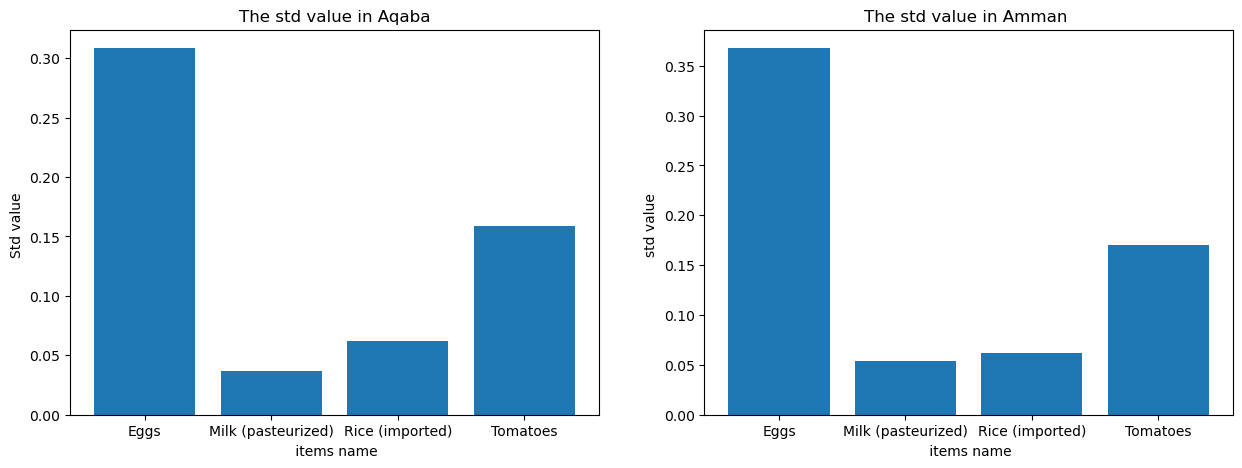

In [7]:
#take sample of item the amman and aqaba and drow the std value
df_aqaba_std_3=df_aqaba_std_2[(df_aqaba_std_2["commodity"]=="Tomatoes")
                              |(df_aqaba_std_2["commodity"]=='Milk (pasteurized)') 
                              |(df_aqaba_std_2["commodity"]=="Rice (imported)")
                              |(df_aqaba_std_2["commodity"]=="Eggs")]
df_amman_std_3=df_amman_std_2[(df_amman_std_2["commodity"]=="Tomatoes")
                          |(df_amman_std_2["commodity"]=='Milk (pasteurized)') 
                          |(df_amman_std_2["commodity"]=="Rice (imported)")
                          |(df_amman_std_2["commodity"]=="Eggs")]
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.bar(df_aqaba_std_3['commodity'],df_aqaba_std_3['mean price'])
plt.title('The std value in Aqaba')
plt.ylabel('Std value ')
plt.xlabel(' items name')

plt.subplot(1, 2, 2)
plt.bar(df_amman_std_3['commodity'],df_amman_std_3['mean price'])
plt.title('The std value in Amman ')
plt.ylabel('std value ')
plt.xlabel(' items name')
plt.show()

In [8]:
#to make the filteration the item easy
def get_from_data(item):
    return new_National_Average[new_National_Average['commodity']==item]
def get_from_origin_data(item_1):
    return read_data_1[read_data_1['commodity']==item_1]

<p>Draw box plot for mean prices for Amman and Aqaba for selected items</p>

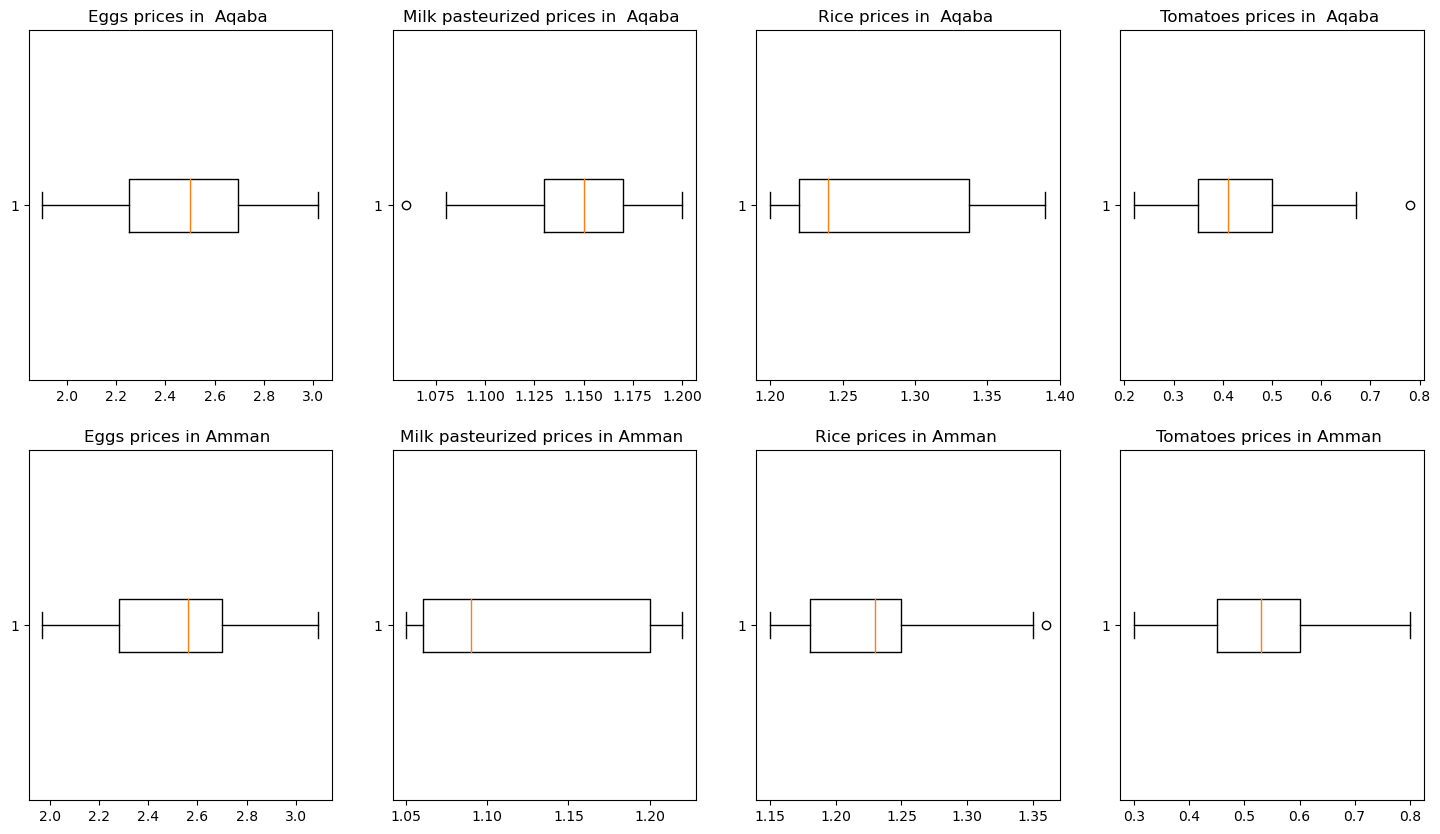

In [9]:
#Preparing and working on Eggs,'Milk (pasteurized)',Rice (imported) and  Tomatoes data in amman and aqaba
#this data use in presentation 
Eggs_Aqaba=get_from_origin_data('Eggs')
Eggs_Aqaba_1=Eggs_Aqaba[Eggs_Aqaba["market"]=='Al Aqaba']
Eggs_Aqaba_1=Eggs_Aqaba_1.drop(Eggs_Aqaba_1.index[0])
Eggs_Amman=get_from_origin_data('Eggs')
Eggs_Amman_1=Eggs_Amman[Eggs_Amman["market"]=='Amman']
Eggs_Amman_1=Eggs_Amman_1.drop(Eggs_Amman_1.index[0])

Milk_pasteurized_Aqaba=get_from_origin_data('Milk (pasteurized)')
Milk_pasteurized_Aqaba=Milk_pasteurized_Aqaba[Milk_pasteurized_Aqaba["market"]=='Al Aqaba']
Milk_pasteurized_Aqaba=Milk_pasteurized_Aqaba.drop(Milk_pasteurized_Aqaba.index[0])
Milk_pasteurized_Amman=get_from_origin_data('Milk (pasteurized)')
Milk_pasteurized_Amman=Milk_pasteurized_Amman[Milk_pasteurized_Amman["market"]=='Amman']
Milk_pasteurized_Amman=Milk_pasteurized_Amman.drop(Milk_pasteurized_Amman.index[0])

Rice_imported_Aqaba=get_from_origin_data('Rice (imported)')
Rice_imported_Aqaba=Rice_imported_Aqaba[Rice_imported_Aqaba["market"]=='Al Aqaba']
Rice_imported_Aqaba=Rice_imported_Aqaba.drop(Rice_imported_Aqaba.index[0])
Rice_imported_Amman=get_from_origin_data('Rice (imported)')
Rice_imported_Amman=Rice_imported_Amman[Rice_imported_Amman["market"]=='Amman']
Rice_imported_Amman=Rice_imported_Amman.drop(Rice_imported_Amman.index[0:2])

Tomatoes_Aqaba=get_from_origin_data('Tomatoes')
Tomatoes_Aqaba=Tomatoes_Aqaba[Tomatoes_Aqaba["market"]=='Al Aqaba']
Tomatoes_Aqaba=Tomatoes_Aqaba.drop(Tomatoes_Aqaba.index[0])
Tomatoes_Amman =get_from_origin_data('Tomatoes')
Tomatoes_Amman=Tomatoes_Amman[Tomatoes_Amman["market"]=='Amman']
Tomatoes_Amman=Tomatoes_Amman.drop(Tomatoes_Amman.index[0])

plt.figure(figsize=(18,10))
plt.subplot(2, 4, 1)
plt.boxplot(Eggs_Aqaba_1["price"],vert=False )

plt.title('Eggs prices in  Aqaba ')
plt.subplot(2, 4, 5)
plt.boxplot(Eggs_Amman_1["price"],vert=False )

plt.title('Eggs prices in Amman ')
plt.subplot(2, 4, 2)
plt.boxplot(Milk_pasteurized_Aqaba["price"],vert=False )
plt.title('Milk pasteurized prices in  Aqaba ')
plt.subplot(2, 4, 6)
plt.boxplot(Milk_pasteurized_Amman["price"],vert=False )
plt.title('Milk pasteurized prices in Amman ')
plt.subplot(2, 4, 3)
plt.boxplot(Rice_imported_Aqaba["price"],vert=False )
plt.title('Rice prices in  Aqaba ')
plt.xticks([1.20,1.25,1.30,1.35,1.40])
plt.subplot(2, 4, 7)
plt.boxplot(Rice_imported_Amman["price"],vert=False )
plt.title('Rice prices in Amman ')

plt.subplot(2, 4, 4)
plt.boxplot(Tomatoes_Aqaba["price"],vert=False )
plt.title('Tomatoes prices in  Aqaba ')
plt.subplot(2, 4, 8)
plt.boxplot(Tomatoes_Amman["price"],vert=False )
plt.title('Tomatoes prices in Amman ')
plt.show()

In [10]:
#Preparing and working on Oil (olive) data in amman and aqaba
oil_olive_Aqaba=get_from_origin_data('Oil (olive)')
oil_olive_Aqaba_1=oil_olive_Aqaba[oil_olive_Aqaba["market"]=='Al Aqaba']
oil_olive_Aqaba_2=oil_olive_Aqaba_1.drop(oil_olive_Aqaba_1.index[0])
oil_olive_Aqaba_2['pct_change']=oil_olive_Aqaba_2.price.pct_change( periods=-1)

oil_olive_Amman=get_from_origin_data('Oil (olive)')
oil_olive_Amman=oil_olive_Amman[oil_olive_Amman["market"]=='Amman']
oil_olive_Amman=oil_olive_Amman.drop(oil_olive_Amman.index[0])
date_columns = oil_olive_Amman.select_dtypes(include=['datetime64']).columns.tolist()
oil_olive_Amman[date_columns] = oil_olive_Amman[date_columns].astype(str)


oil_olive_Amman['pct_change']=oil_olive_Amman.price.pct_change( periods=-1)
df=oil_olive_Amman.groupby(["year","commodity"])["price"].mean()

mean_val_1 = oil_olive_Aqaba_1['price'].mean()
mean_val_2 = oil_olive_Amman['price'].mean()
print('the mean value for Oil (olive) Al Aqaba is: ',round(mean_val_1, 2))
print('the mean value for Oil (olive) Amman is: ',round(mean_val_2, 2))


the mean value for Oil (olive) Al Aqaba is:  7.33
the mean value for Oil (olive) Amman is:  6.69


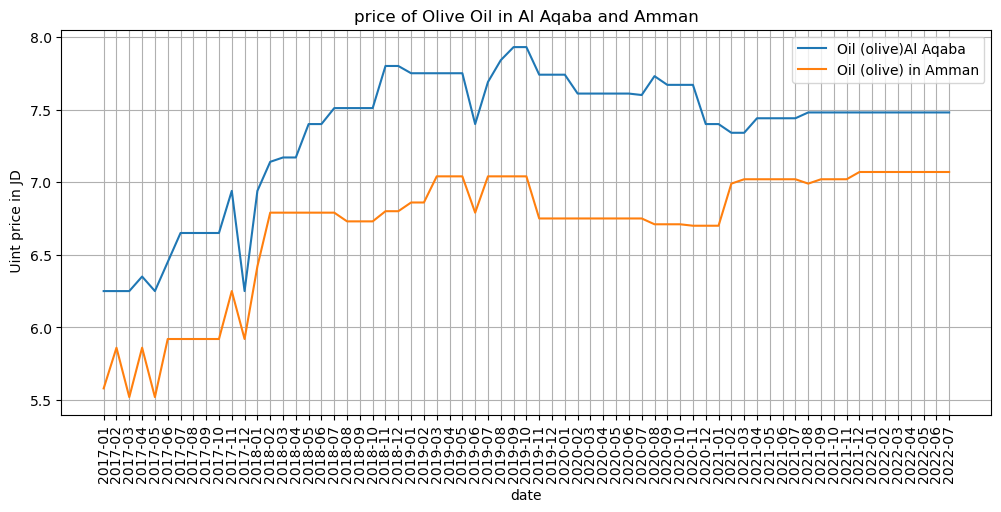

In [11]:
#use the plot chart to description the relationship between it

plt.figure(figsize=(12,5))
plt.plot(oil_olive_Aqaba_2['date_1'],oil_olive_Aqaba_2 ["price"],label='Oil (olive)Al Aqaba')
plt.plot(oil_olive_Amman['date_1'],oil_olive_Amman["price"],label='Oil (olive) in Amman')
plt.title('price of Olive Oil in Al Aqaba and Amman')
plt.xlabel('date')
plt.ylabel(' Uint price in JD')
plt.legend()
plt.grid()
plt.tick_params(axis='x', rotation=90)
plt.show()



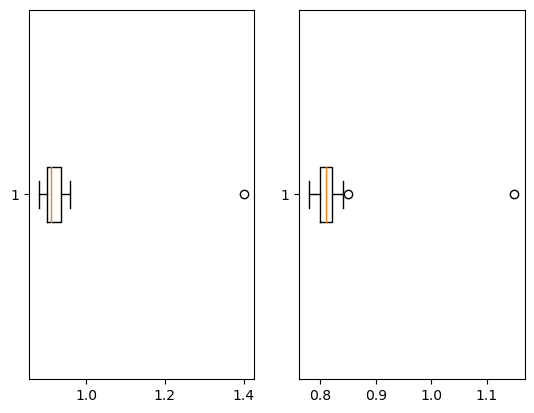

In [12]:
#Preparing and working on Wheat flour data in amman and aqaba

Wheat_flour_Aqaba=get_from_origin_data('Wheat flour')
Wheat_flour_Aqaba_1=Wheat_flour_Aqaba[Wheat_flour_Aqaba["market"]=='Al Aqaba']
Wheat_flour_Aqaba_2=Wheat_flour_Aqaba_1.drop(Wheat_flour_Aqaba_1.index[0])

Wheat_flour_Amman=get_from_origin_data('Wheat flour')
Wheat_flour_Amman_1=Wheat_flour_Amman[Wheat_flour_Amman["market"]=='Amman']
Wheat_flour_Amman_2=Wheat_flour_Amman_1.drop(Wheat_flour_Amman_1.index[0])
plt.subplot(1, 2, 1)
plt.boxplot(Wheat_flour_Aqaba_2["price"],vert=False )
plt.subplot(1, 2, 2)
plt.boxplot(Wheat_flour_Amman_2["price"],vert=False )
plt.show()


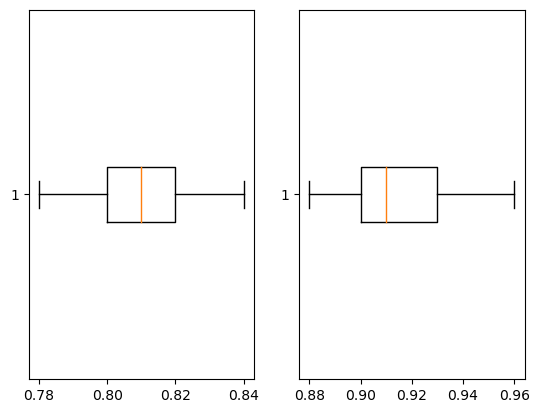

In [13]:
#after  we see the out layer in price we will remove this outer layer to make the chart reasonable
Wheat_flour_Aqaba=get_from_origin_data('Wheat flour')
Wheat_flour_Aqaba_1=Wheat_flour_Aqaba[Wheat_flour_Aqaba["market"]=='Al Aqaba']
Wheat_flour_Aqaba_3=Wheat_flour_Aqaba_1.drop(Wheat_flour_Aqaba_1.index[0])
Wheat_flour_Aqaba_3
Wheat_flour_Amman=get_from_origin_data('Wheat flour')
Wheat_flour_Amman_2=Wheat_flour_Amman[Wheat_flour_Amman["market"]=='Amman']
Wheat_flour_Amman_3=Wheat_flour_Amman_1.drop(Wheat_flour_Amman_1.index[0])

cols_1 = ['price'] # one or more
Q1 = Wheat_flour_Aqaba_3[cols_1].quantile(0.25)
Q3 = Wheat_flour_Aqaba_3[cols_1].quantile(0.75)
IQR = Q3 - Q1
Wheat_flour_Aqaba_3 = Wheat_flour_Aqaba_3[~((Wheat_flour_Aqaba_3[cols_1] < (Q1 - 1.5 * IQR)) |(Wheat_flour_Aqaba_3[cols_1] > (Q3 + 1.5 * IQR))).any(axis=1)]
plt.boxplot(Wheat_flour_Aqaba_3["price"] , vert=False)

cols = ['price'] # one or more
Q1 = Wheat_flour_Amman_3[cols].quantile(0.25)
Q3 = Wheat_flour_Amman_3[cols].quantile(0.75)
IQR = Q3 - Q1
Wheat_flour_Amman_3 = Wheat_flour_Amman_3[~((Wheat_flour_Amman_3[cols] < (Q1 - 1.5 * IQR)) |(Wheat_flour_Amman_3[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
plt.subplot(1, 2, 2)
plt.boxplot(Wheat_flour_Aqaba_3["price"] , vert=False)
plt.subplot(1, 2, 1)
plt.boxplot(Wheat_flour_Amman_3["price"] , vert=False)
plt.show()

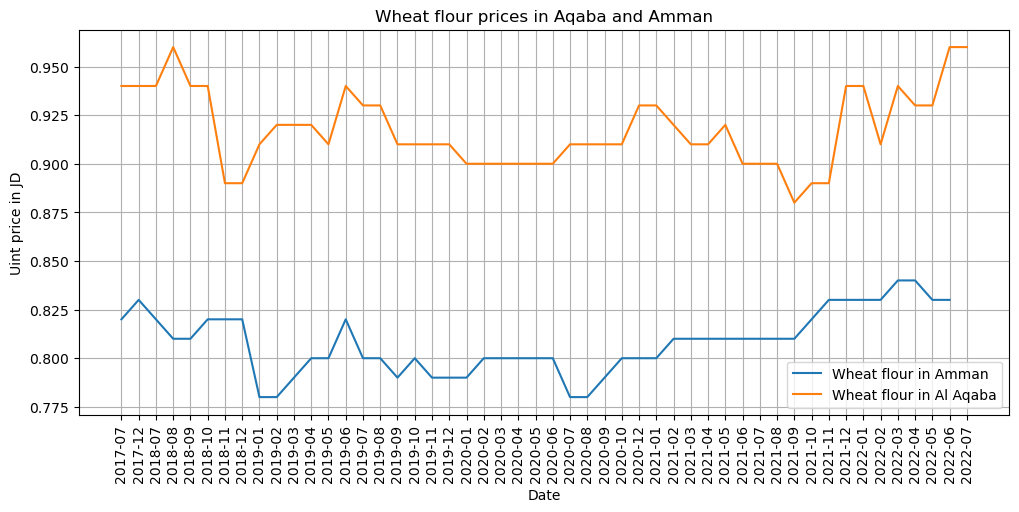

the mean value for Wheat flour in Al Aqaba is:  0.92
the mean value for Wheat flour in Amman is:  0.81


In [14]:
#use the plot chart to description the relationship between it
mean_val_1 = Wheat_flour_Aqaba_3['price'].mean()
mean_val_2 = Wheat_flour_Amman_3['price'].mean()
plt.figure(figsize=(12,5))
plt.plot(Wheat_flour_Amman_3['date_1'],Wheat_flour_Amman_3 ["price"],label='Wheat flour in Amman')
plt.plot(Wheat_flour_Aqaba_3['date_1'],Wheat_flour_Aqaba_3 ["price"],label='Wheat flour in Al Aqaba')
plt.title('Wheat flour prices in Aqaba and Amman')
plt.xlabel('Date')
plt.ylabel('Uint price in JD')
plt.legend()
plt.tick_params(axis='x', rotation=90)
plt.grid()
plt.show()
print('the mean value for Wheat flour in Al Aqaba is: ',round(mean_val_1, 2))
print('the mean value for Wheat flour in Amman is: ',round(mean_val_2, 2))

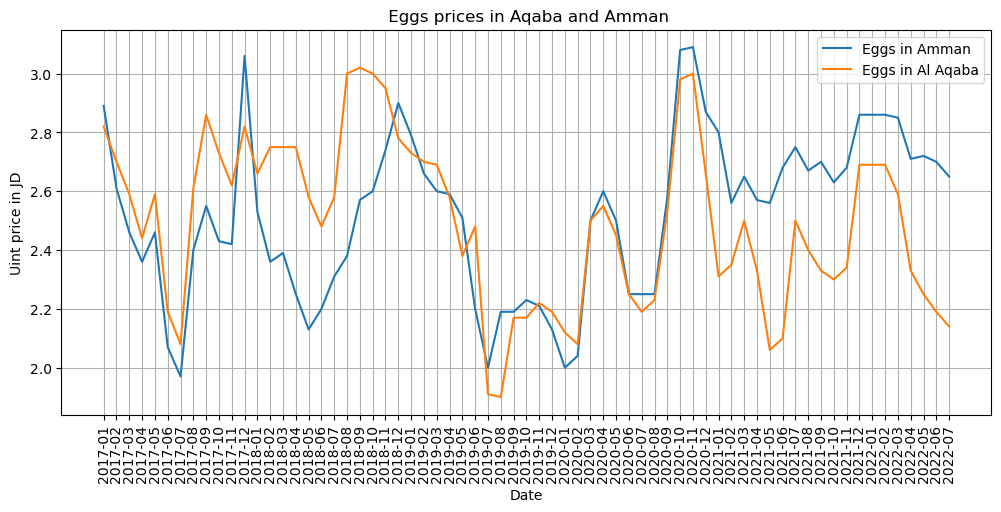

the mean value for Eggs in Al Aqaba is:  2.49
the mean value for Eggs in Amman is:  2.52


In [15]:
#use the plot chart to description the relationship between it
mean_val_1 = Eggs_Aqaba_1['price'].mean()
mean_val_2 = Eggs_Amman_1['price'].mean()
plt.figure(figsize=(12,5))
plt.plot(Eggs_Amman_1['date_1'],Eggs_Amman_1 ["price"],label='Eggs in Amman')
plt.plot(Eggs_Aqaba_1['date_1'],Eggs_Aqaba_1 ["price"],label='Eggs in Al Aqaba')
plt.title(' Eggs prices in Aqaba and Amman')
plt.xlabel('Date')
plt.ylabel('Uint price in JD')

plt.legend()
plt.tick_params(axis='x', rotation=90)
plt.grid()
plt.show()
print('the mean value for Eggs in Al Aqaba is: ',round(mean_val_1, 2))
print('the mean value for Eggs in Amman is: ',round(mean_val_2, 2))

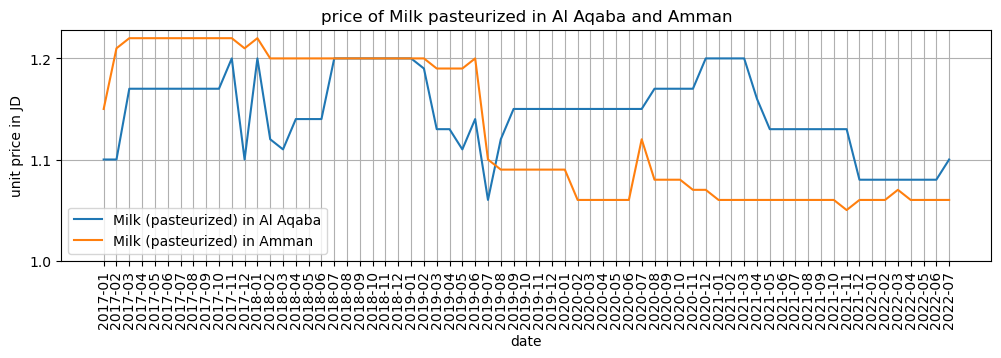

the mean value for Milk (pasteurized) in Al Aqaba is:  1.15
the mean value for Milk (pasteurized) in Amman is:  1.13


In [16]:
#use the plot chart to description the relationship between it
mean_val_1 = Milk_pasteurized_Aqaba['price'].mean()
mean_val_2 = Milk_pasteurized_Amman['price'].mean()
plt.figure(figsize=(12,3))
plt.plot(Milk_pasteurized_Aqaba['date_1'],Milk_pasteurized_Aqaba ["price"],label='Milk (pasteurized) in Al Aqaba')
plt.plot(Milk_pasteurized_Amman['date_1'],Milk_pasteurized_Amman ["price"],label='Milk (pasteurized) in Amman')
plt.title('price of Milk pasteurized in Al Aqaba and Amman')
plt.xlabel('date')
plt.ylabel('unit price in JD')
plt.yticks([1,1.1,1.2,])
plt.legend()
plt.tick_params(axis='x', rotation=90)
plt.grid()
plt.show()
print('the mean value for Milk (pasteurized) in Al Aqaba is: ',round(mean_val_1, 2))
print('the mean value for Milk (pasteurized) in Amman is: ',round(mean_val_2, 2))

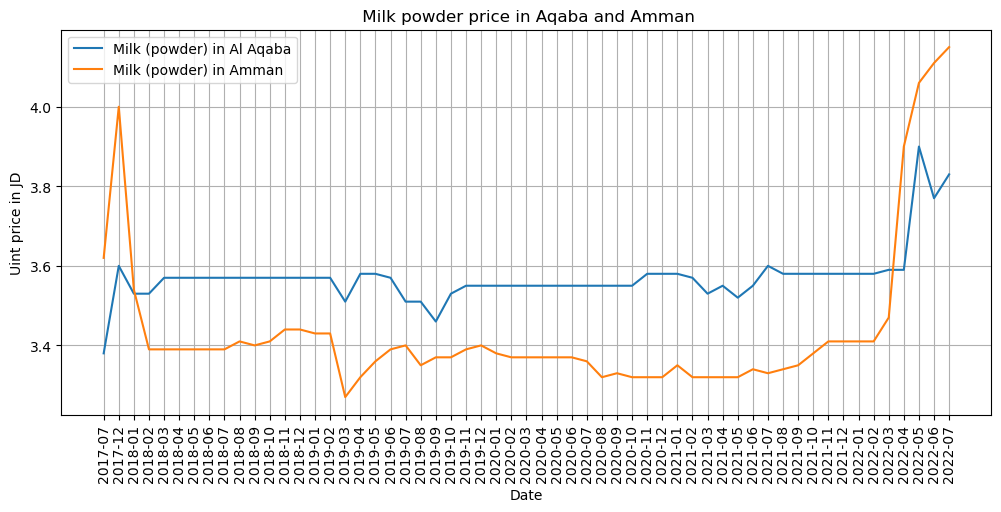

the mean value for Milk powder in Al Aqaba is:  3.57
the mean value for Milk powder in Amman is:  3.44


In [17]:
#Preparing and working on Milk (powder) data in amman and aqaba
#use the plot chart to description the relationship between it
Milk_powder_Aqaba=get_from_origin_data('Milk (powder)')
Milk_powder_Aqaba=Milk_powder_Aqaba[Milk_powder_Aqaba["market"]=='Al Aqaba']
Milk_powder_Aqaba=Milk_powder_Aqaba.drop(Milk_powder_Aqaba.index[0])
Milk_powder_Amman=get_from_origin_data('Milk (powder)')
Milk_powder_Amman=Milk_powder_Amman[Milk_powder_Amman["market"]=='Amman']
Milk_powder_Amman=Milk_powder_Amman.drop(Milk_powder_Amman.index[0])
mean_val_1 = Milk_powder_Aqaba['price'].mean()
mean_val_2 = Milk_powder_Amman['price'].mean()
plt.figure(figsize=(12,5))
plt.plot(Milk_powder_Aqaba['date_1'],Milk_powder_Aqaba ["price"],label='Milk (powder) in Al Aqaba')
plt.plot(Milk_powder_Amman['date_1'],Milk_powder_Amman ["price"],label='Milk (powder) in Amman')
plt.title(' Milk powder price in Aqaba and Amman')
plt.xlabel('Date')
plt.ylabel('Uint price in JD')
plt.legend()
plt.tick_params(axis='x', rotation=90)
plt.grid()
plt.show()
print('the mean value for Milk powder in Al Aqaba is: ',round(mean_val_1, 2))
print('the mean value for Milk powder in Amman is: ',round(mean_val_2, 2))

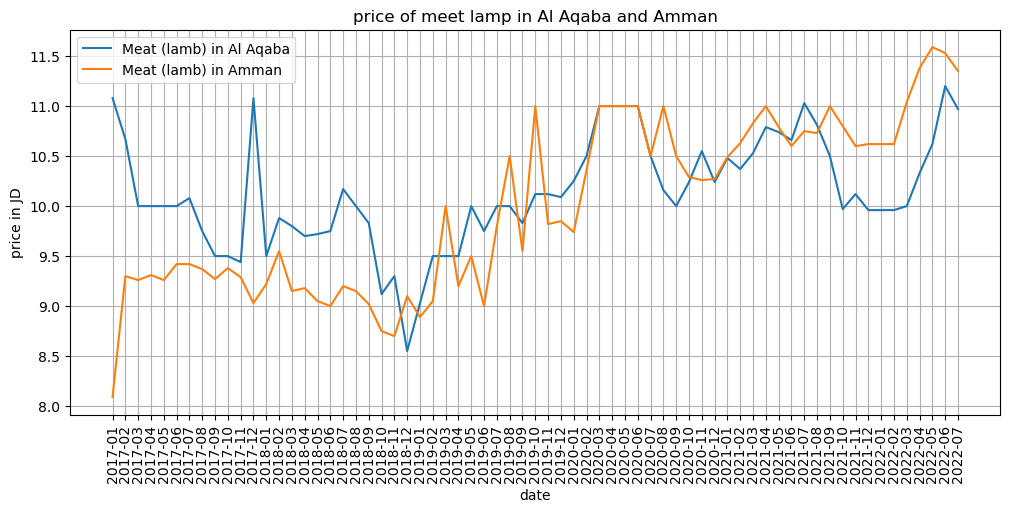

the mean valuo for Meat (lamb) in Al Aqaba is:  10.14
the mean valuo for Meat (lamb) in Amman is:  9.99


In [18]:
#Preparing and working on Meat (lamb) data in amman and aqaba
#use the plot chart to description the relationship between it
Meat_lamb_Aqaba=get_from_origin_data('Meat (lamb)')
Meat_lamb_Aqaba=Meat_lamb_Aqaba[Meat_lamb_Aqaba["market"]=='Al Aqaba']
Meat_lamb_Aqaba=Meat_lamb_Aqaba.drop(Meat_lamb_Aqaba.index[0])
Meat_lamb_Amman=get_from_origin_data('Meat (lamb)')
Meat_lamb_Amman=Meat_lamb_Amman[Meat_lamb_Amman["market"]=='Amman']
Meat_lamb_Amman=Meat_lamb_Amman.drop(Meat_lamb_Amman.index[0])
mean_val_1 = Meat_lamb_Aqaba['price'].mean()
mean_val_2 = Meat_lamb_Amman['price'].mean()
plt.figure(figsize=(12,5))
plt.plot(Meat_lamb_Aqaba['date_1'],Meat_lamb_Aqaba ["price"],label='Meat (lamb) in Al Aqaba')
plt.plot(Meat_lamb_Amman['date_1'],Meat_lamb_Amman ["price"],label='Meat (lamb) in Amman')
plt.title('price of meet lamp in Al Aqaba and Amman')
plt.xlabel('date')
plt.ylabel('price in JD')
plt.legend()
plt.tick_params(axis='x', rotation=90)
plt.grid()
plt.show()
print('the mean valuo for Meat (lamb) in Al Aqaba is: ',round(mean_val_1, 2))
print('the mean valuo for Meat (lamb) in Amman is: ',round(mean_val_2, 2))

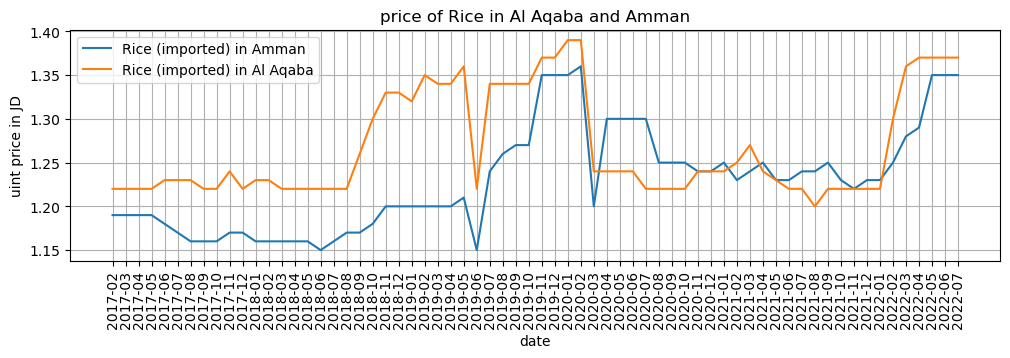

the mean value for Rice (imported) in Al Aqaba is:  1.27
the mean value for Rice (imported) in Amman is:  1.23


In [19]:

#use the plot chart to description the relationship between it
mean_val_1 = Rice_imported_Aqaba['price'].mean()
mean_val_2 = Rice_imported_Amman['price'].mean()
plt.figure(figsize=(12,3))
plt.plot(Rice_imported_Amman['date_1'],Rice_imported_Amman ["price"],label='Rice (imported) in Amman')
plt.plot(Rice_imported_Aqaba['date_1'],Rice_imported_Aqaba ["price"],label='Rice (imported) in Al Aqaba')

plt.title('price of Rice in Al Aqaba and Amman')
plt.xlabel('date')
plt.ylabel('uint price in JD')
plt.legend()
plt.tick_params(axis='x', rotation=90)
plt.grid()
plt.show()
print('the mean value for Rice (imported) in Al Aqaba is: ',round(mean_val_1, 2))
print('the mean value for Rice (imported) in Amman is: ',round(mean_val_2, 2))

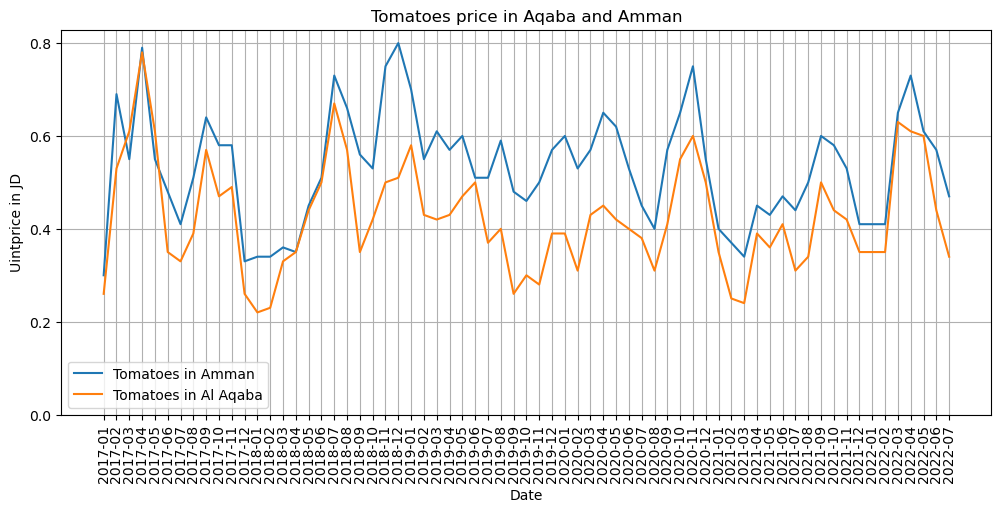

the mean value for Tomatoes in Al Aqaba is:  0.42
the mean value for Tomatoes in Amman is:  0.53


In [20]:
#use the plot chart to description the relationship between it
mean_val_1 = Tomatoes_Aqaba['price'].mean()
mean_val_2 = Tomatoes_Amman['price'].mean()
plt.figure(figsize=(12,5))
plt.plot(Tomatoes_Amman['date_1'],Tomatoes_Amman ["price"],label='Tomatoes in Amman')
plt.plot(Tomatoes_Aqaba['date_1'],Tomatoes_Aqaba ["price"],label='Tomatoes in Al Aqaba')

plt.title('Tomatoes price in Aqaba and Amman')
plt.xlabel('Date')
plt.ylabel('Uintprice in JD')
plt.legend()
plt.yticks([0,0.2,0.4,0.6,0.8])
plt.tick_params(axis='x', rotation=90)
plt.grid()
plt.show()
print('the mean value for Tomatoes in Al Aqaba is: ',round(mean_val_1, 2))
print('the mean value for Tomatoes in Amman is: ',round(mean_val_2, 2))

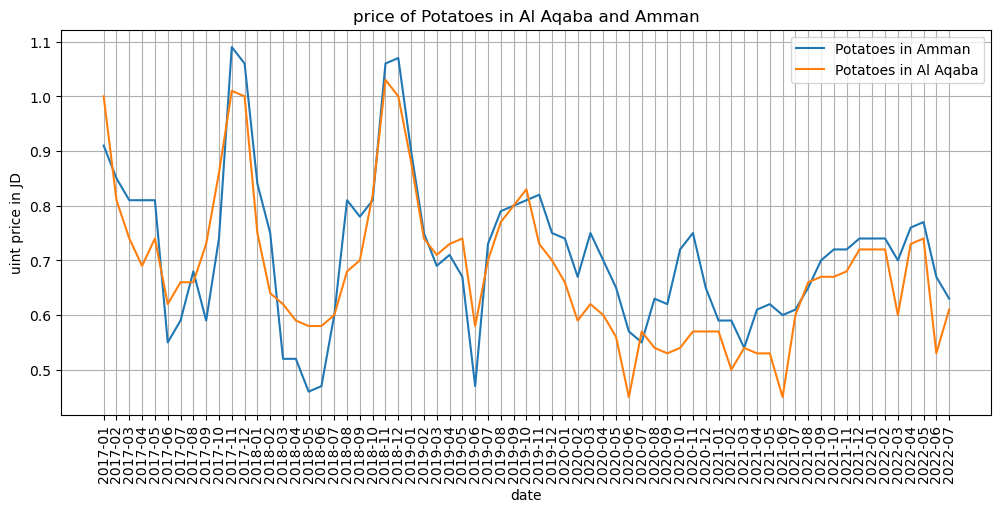

the mean value for Potatoes in Al Aqaba is:  0.68
the mean value for Potatoes in Amman is:  0.71


In [21]:
#Preparing and working on Potatoes data in amman and aqaba
#use the plot chart to description the relationship between it
Potatoes_Aqaba=get_from_origin_data('Potatoes')
Potatoes_Aqaba=Potatoes_Aqaba[Potatoes_Aqaba["market"]=='Al Aqaba']
Potatoes_Aqaba=Potatoes_Aqaba.drop(Potatoes_Aqaba.index[0])
Potatoes_Amman =get_from_origin_data('Potatoes')
Potatoes_Amman=Potatoes_Amman[Potatoes_Amman["market"]=='Amman']
Potatoes_Amman=Potatoes_Amman.drop(Potatoes_Amman.index[0])
mean_val_1 = Potatoes_Aqaba['price'].mean()
mean_val_2 = Potatoes_Amman['price'].mean()
plt.figure(figsize=(12,5))
plt.plot(Potatoes_Amman['date_1'],Potatoes_Amman ["price"],label='Potatoes in Amman')
plt.plot(Potatoes_Aqaba['date_1'],Potatoes_Aqaba ["price"],label='Potatoes in Al Aqaba')

plt.title('price of Potatoes in Al Aqaba and Amman')
plt.xlabel('date')
plt.ylabel('uint price in JD')
plt.legend()
plt.tick_params(axis='x', rotation=90)
plt.grid()
plt.show()
print('the mean value for Potatoes in Al Aqaba is: ',round(mean_val_1, 2))
print('the mean value for Potatoes in Amman is: ',round(mean_val_2, 2))

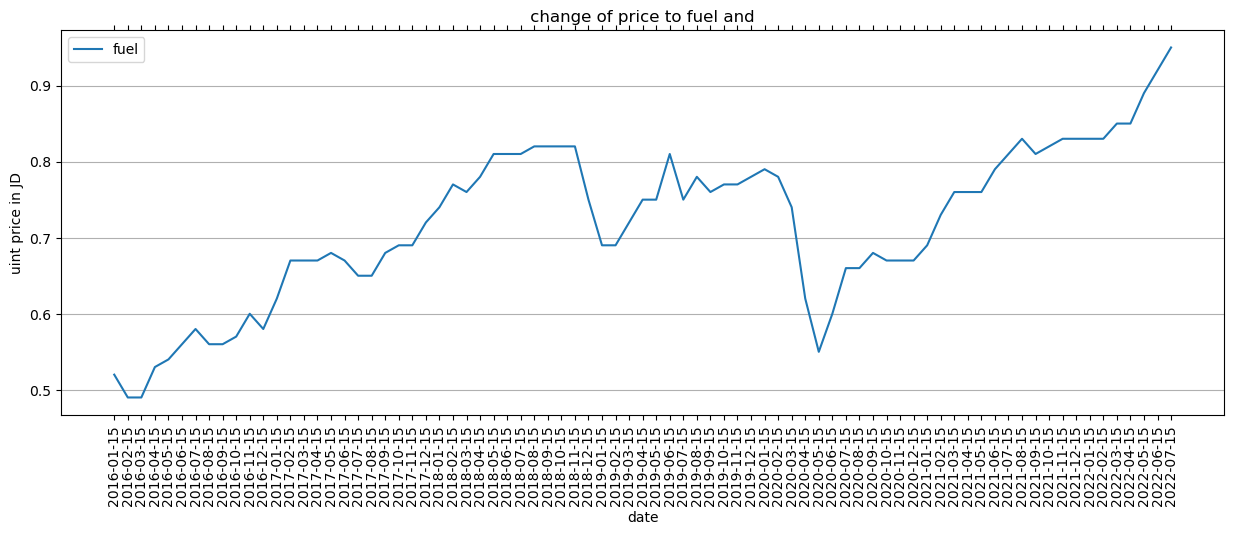

In [22]:
#Preparing and working on Potatoes data in Zarqa 
#use the plot chart to description the Fuel (petrol-gasoline) price change with time 
fuel=read_data[read_data['commodity']=='Fuel (petrol-gasoline)']
fuel_1=fuel[fuel['admin1']=='Zarqa']

plt.figure(figsize=(15, 5))
plt.plot(fuel_1['date'],fuel_1['price'],label='fuel')
plt.title(" change of price to fuel and ")
plt.ylabel('uint price in JD')
plt.xlabel('date')
plt.grid()
plt.legend()

plt.tick_params(axis='x', rotation=90,reset=True)

plt.show()


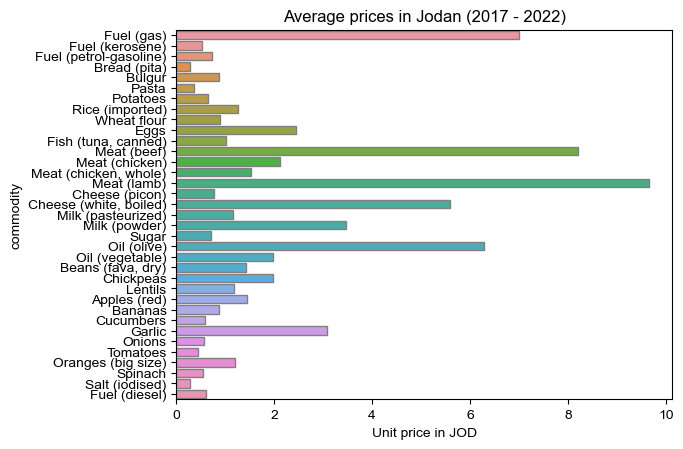

In [23]:
#to see the mean value to all item in dataframe to presentation purposes
HI = read_data_1[['price','commodity']]
HI.groupby('commodity').mean()

avg_price = sns.barplot(data=read_data_1 , x = "price", y = "commodity" ,ci = 0 , edgecolor=".5")
avg_price.set(xlabel ="Unit price in JOD", ylabel = "commodity", title ='Average prices in Jodan (2017 - 2022)')
avg_price = sns.set_style("whitegrid")